均值滤波（Mean Filter）

In [15]:
import numpy as np

class MeanFilter:
    def __init__(self, **kwargs):
        """
        初始化均值滤波器
        
        :param kwargs: 可选参数
        """
        pass

    def apply(self, signal, kernel_size=3):
        """
        对信号应用均值滤波
        
        :param signal: 输入信号
        :param kernel_size: 滤波器的大小（窗口大小），默认为3
        :return: 滤波后的信号
        """
        if kernel_size % 2 == 0:
            raise ValueError("Kernel size must be an odd number.")

        # 创建均匀权重的滤波器核
        kernel = np.ones(kernel_size) / kernel_size

        # 使用卷积运算实现均值滤波
        filtered_signal = np.convolve(signal, kernel, mode='same')
        
        return filtered_signal

In [16]:
# 创建均值滤波器对象
mean_filter = MeanFilter()

# 示例输入信号
input_signal = np.array([1, 2, 3, 3, 5, 6, 7, 8, 9])

# 应用均值滤波
filtered_signal = mean_filter.apply(input_signal, kernel_size=3)

print("Input Signal:", input_signal)
print("Filtered Signal:", filtered_signal)

Input Signal: [1 2 3 3 5 6 7 8 9]
Filtered Signal: [1.         2.         2.66666667 3.66666667 4.66666667 6.
 7.         8.         5.66666667]


中值滤波（Median Filter）

In [13]:
import numpy as np
from scipy.ndimage import median_filter

class MedianFilter:
    def __init__(self, **kwargs):
        """
        初始化中值滤波器
        
        :param kwargs: 可选参数
        """
        pass

    def apply(self, signal, kernel_size=3):
        """
        对信号应用中值滤波
        
        :param signal: 输入信号
        :param kernel_size: 滤波器的大小(窗口大小),默认为3
        :return: 滤波后的信号
        """
        if kernel_size % 2 == 0:
            raise ValueError("Kernel size must be an odd number.")

        # 使用SciPy的中值滤波函数
        filtered_signal = median_filter(signal, kernel_size)
        
        return filtered_signal

In [18]:
# 创建中值滤波器对象
median_filter_instance = MedianFilter()

# 示例输入信号
input_signal = np.array([1, 3, 2, 4, 5, 6, 7, 8, 9])

# 应用中值滤波
filtered_signal = median_filter_instance.apply(input_signal, kernel_size=3)

print("Input Signal:", input_signal)
print("Filtered Signal:", filtered_signal)

Input Signal: [1 3 2 4 5 6 7 8 9]
Filtered Signal: [1 2 3 4 5 6 7 8 9]


高斯滤波（Gaussian Filter）

In [23]:
import numpy as np
from scipy.ndimage import gaussian_filter

class GaussianFilter:
    def __init__(self, **kwargs):
        """
        初始化高斯滤波器
        
        :param kwargs: 可选参数
        """
        pass

    def apply(self, signal, sigma=1):
        """
        对信号应用高斯滤波
        
        :param signal: 输入信号
        :param sigma: 高斯核的标准差,默认为1
        :return: 滤波后的信号
        """
        # 使用SciPy的高斯滤波函数
        filtered_signal = gaussian_filter(signal, sigma=sigma)
        
        return filtered_signal


一维

In [24]:
# 创建高斯滤波器对象
gaussian_filter_instance = GaussianFilter()

# 示例输入信号
input_signal = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# 应用高斯滤波
filtered_signal = gaussian_filter_instance.apply(input_signal, sigma=1)

print("Input Signal:", input_signal)
print("Filtered Signal:", filtered_signal)

Input Signal: [1 2 3 4 5 6 7 8 9]
Filtered Signal: [1 2 3 4 5 5 6 7 8]


二维

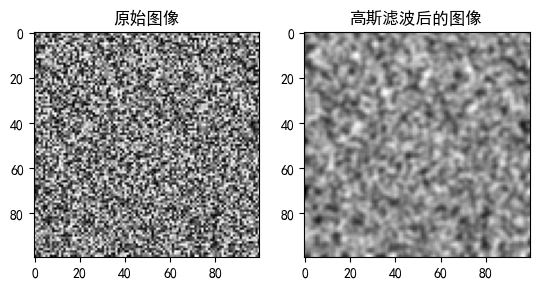

In [3]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

# 显示中文
plt.rcParams['font.sans-serif']=['SimHei']
# 生成一些示例数据
np.random.seed(42)
image = np.random.rand(100, 100)

# 指定高斯滤波器的标准差
sigma = 1.0

# 使用 scipy 中的 gaussian_filter 函数进行高斯滤波
smoothed_image = gaussian_filter(image, sigma)

# 绘制原始图像和经过高斯滤波后的图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('原始图像')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('高斯滤波后的图像')

plt.show()

**加权移动平均滤波器（Weighted Moving Average Filter）**

In [28]:
import numpy as np

class WeightedMovingAverageFilter:
    def __init__(self, weights):
        """
        初始化加权移动平均滤波器
        
        :param weights: 用于加权的权重数组
        """
        self.weights = np.array(weights)
        self.weights /= np.sum(self.weights)  # 标准化权重确保其总和为1

    def apply(self, signal):
        """
        对信号应用加权移动平均滤波
        
        :param signal: 输入信号
        :return: 滤波后的信号
        """
        # 使用卷积运算实现加权移动平均
        filtered_signal = np.convolve(signal, self.weights, mode='vaild')
        
        return filtered_signal

In [29]:
# 创建加权移动平均滤波器对象
weights = [0.1, 0.1, 0.4, 0.3, 0.1]
wma_filter = WeightedMovingAverageFilter(weights)

# 示例输入信号
input_signal = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# 应用加权移动平均滤波
filtered_signal = wma_filter.apply(input_signal)

print("Input Signal:", input_signal)
print("Filtered Signal:", filtered_signal)

Input Signal: [1 2 3 4 5 6 7 8 9]
Filtered Signal: [2.8 3.8 4.8 5.8 6.8]


**指数加权移动平均（Exponential Moving Average Filter）**

In [30]:
import numpy as np

class ExponentialMovingAverageFilter:
    def __init__(self, alpha):
        """
        初始化指数加权移动平均滤波器
        
        :param alpha: 平滑因子，控制权重衰减的速度
        """
        self.alpha = alpha
        self.prev_filtered_value = None

    def apply(self, signal):
        """
        对信号应用指数加权移动平均滤波
        
        :param signal: 输入信号
        :return: 滤波后的信号
        """
        filtered_signal = []
        for value in signal:
            if self.prev_filtered_value is None:
                # 初始情况，直接将当前值作为滤波结果
                filtered_value = value
            else:
                # 指数加权移动平均公式
                filtered_value = self.alpha * value + (1 - self.alpha) * self.prev_filtered_value
            self.prev_filtered_value = filtered_value
            filtered_signal.append(filtered_value)
        return np.array(filtered_signal)

# 示例输入信号
input_signal = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# 创建指数加权移动平均滤波器对象
ema_filter = ExponentialMovingAverageFilter(alpha=0.2)

# 应用指数加权移动平均滤波
filtered_signal = ema_filter.apply(input_signal)

print("Input Signal:", input_signal)
print("Exponential Moving Average Filtered Signal:", filtered_signal)

Input Signal: [1 2 3 4 5 6 7 8 9]
Exponential Moving Average Filtered Signal: [1.         1.2        1.56       2.048      2.6384     3.31072
 4.048576   4.8388608  5.67108864]


小波变换去噪（Wavelet Denoising）

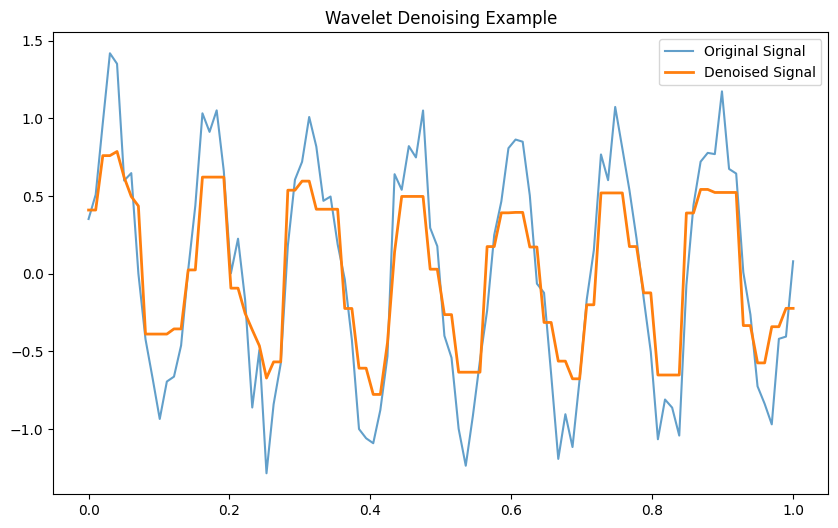

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

class WaveletDenoising:
    def __init__(self, wavelet='db1', level=1, threshold_type='soft'):
        """
        初始化小波变换去噪器
        
        :param wavelet: 小波基函数，默认为 'db1'
        :param level: 小波分解的层数，默认为 1
        :param threshold_type: 阈值处理类型，'soft' 或 'hard'，默认为 'soft'
        """
        self.wavelet = wavelet
        self.level = level
        self.threshold_type = threshold_type

    def apply(self, signal):
        """
        对信号应用小波变换去噪
        
        :param signal: 输入信号
        :return: 去噪后的信号
        """
        # 小波分解
        coeffs = pywt.wavedec(signal, self.wavelet, level=self.level)

        # 阈值处理
        # 阈值是相对于小波系数的最后一层的标准差计算的：threshold = np.std(coeffs[-1]) * 2;
        # 阈值是相对于小波系数的最大值计算的：threshold = 0.2 * np.max(np.abs(coeffs[0]))
        threshold = 0.2 * np.max(np.abs(coeffs[0])) 
        coeffs = [pywt.threshold(c, threshold, mode=self.threshold_type) for c in coeffs]

        # 小波逆变换
        denoised_signal = pywt.waverec(coeffs, self.wavelet)

        return denoised_signal

# 示例输入信号
np.random.seed(0)
t = np.linspace(0, 1, 100)
input_signal = np.sin(2 * np.pi * 7 * t) + 0.2 * np.random.randn(100)

# 创建小波变换去噪器对象
wavelet_denoiser = WaveletDenoising(wavelet='db1', level=3, threshold_type='soft')

# 应用小波变换去噪
denoised_signal = wavelet_denoiser.apply(input_signal)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(t, input_signal, label='Original Signal', alpha=0.7)
plt.plot(t, denoised_signal, label='Denoised Signal', linewidth=2)
plt.title('Wavelet Denoising Example')
plt.legend()
plt.show()

卡尔曼滤波（Kalman Filter）

In [1]:
import numpy as np

class KalmanFilter:
    def __init__(self, initial_state, initial_covariance, process_noise, measurement_noise):
        # 初始状态估计
        self.state_estimate = initial_state
        # 初始状态协方差矩阵
        self.covariance_estimate = initial_covariance
        # 系统过程噪声的协方差矩阵
        self.process_noise = process_noise
        # 测量噪声的协方差矩阵
        self.measurement_noise = measurement_noise

    def predict(self, control_input=None):
        # 预测步骤
        # 预测状态
        self.state_estimate = np.dot(self.state_transition_matrix(), self.state_estimate)
        # 预测协方差
        self.covariance_estimate = (np.dot(np.dot(self.state_transition_matrix(), self.covariance_estimate), self.state_transition_matrix().T)+ self.process_noise)
        return self.state_estimate

    def update(self, measurement):
        # 更新步骤
        # 计算卡尔曼增益
        kalman_gain = np.dot(
            np.dot(self.covariance_estimate, self.measurement_matrix().T),
            np.linalg.inv(np.dot(np.dot(self.measurement_matrix(), self.covariance_estimate), self.measurement_matrix().T) + self.measurement_noise)
        )
        # 更新状态估计
        self.state_estimate = self.state_estimate + np.dot(kalman_gain, measurement - np.dot(self.measurement_matrix(), self.state_estimate))
        # 更新协方差估计
        self.covariance_estimate = np.dot((np.eye(len(self.state_estimate)) - np.dot(kalman_gain, self.measurement_matrix())), self.covariance_estimate)
        return self.state_estimate

    def state_transition_matrix(self):
        # 定义状态转移矩阵，这里简单假设状态是一维的，实际中需要根据系统模型定义
        return np.array([[1]])

    def measurement_matrix(self):
        # 定义测量矩阵，这里简单假设状态是一维的，实际中需要根据系统模型定义
        return np.array([[1]])

# 示例使用
# 定义初始状态
initial_state = np.array([0])
# 定义初始协方差矩阵
initial_covariance = np.array([[1]])
# 定义系统过程噪声的协方差矩阵
process_noise = np.array([[0.01]])
# 定义测量噪声的协方差矩阵
measurement_noise = np.array([[0.1]])

# 创建KalmanFilter对象
kf = KalmanFilter(initial_state, initial_covariance, process_noise, measurement_noise)

# 模拟输入测量值
measurements = np.array([1, 2, 3, 4, 5])

# 逐步进行预测和更新
for measurement in measurements:
    kf.predict()
    kf.update(np.array([measurement]))
    print(f"Predicted State: {kf.state_estimate.flatten()}, Measurement: {measurement}, Updated State: {kf.state_estimate.flatten()}")


Predicted State: [0.90990991], Measurement: 1, Updated State: [0.90990991]
Predicted State: [1.45764231], Measurement: 2, Updated State: [1.45764231]
Predicted State: [2.03750944], Measurement: 3, Updated State: [2.03750944]
Predicted State: [2.67036468], Measurement: 4, Updated State: [2.67036468]
Predicted State: [3.36226689], Measurement: 5, Updated State: [3.36226689]


Savitzky-Golay滤波（Savitzky-Golay Filter）

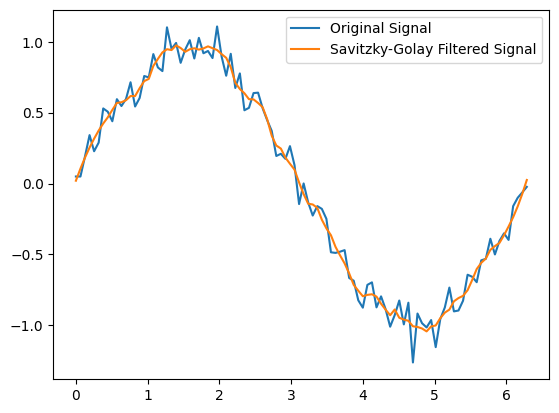

In [7]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

class SavitzkyGolayFilter:
    def __init__(self, window_size, order):
        """
        初始化 Savitzky-Golay 滤波器
        
        :param window_size: 滑动窗口的大小
        :param order: 拟合多项式的阶数
        """
        self.window_size = window_size
        self.order = order

    def apply(self, signal):
        """
        应用 Savitzky-Golay 滤波器
        
        :param signal: 输入信号
        :return: 滤波后的信号
        """
        filtered_signal = savgol_filter(signal, window_length=self.window_size, polyorder=self.order)
        return filtered_signal

# 示例使用
# 生成示例数据
np.random.seed(42)
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + 0.1 * np.random.randn(100)

# 创建 SavitzkyGolayFilter 对象
window_size = 9
order = 2
sg_filter = SavitzkyGolayFilter(window_size, order)

# 应用滤波器
filtered_y = sg_filter.apply(y)

# 绘制原始数据和滤波后的数据
plt.plot(x, y, label='Original Signal')
plt.plot(x, filtered_y, label='Savitzky-Golay Filtered Signal')
plt.legend()
plt.show()

局部回归滤波（LOESS）

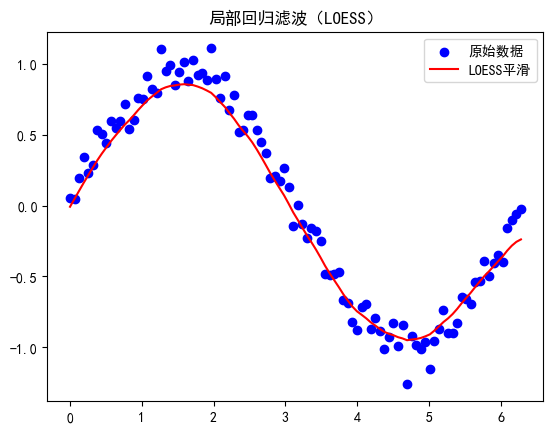

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class LOESS:
    def __init__(self, x, y, span=0.3, degree=1):
        self.x = x
        self.y = y
        self.span = span
        self.degree = degree

    def loess_smooth(self):
        smooth_y = np.zeros_like(self.y)

        # 对每个数据点进行 LOESS 平滑
        for i in range(len(self.x)):
            distances = np.abs(self.x - self.x[i])
            # 计算权重，使用指数衰减函数
            weights = np.exp(-0.5 * (distances / self.span)**self.degree)
            weighted_x = self.x * weights
            weighted_y = self.y * weights

            # 使用多项式拟合加权后的数据
            coefficients = np.polyfit(weighted_x, weighted_y, self.degree)
            poly = np.poly1d(coefficients)

            # 在当前点处，计算多项式的值作为平滑后的值
            smooth_y[i] = poly(self.x[i])

        return smooth_y

    def plot_loess(self):
        # 使用LOESS平滑数据
        smoothed_y = self.loess_smooth()
        # 显示中文
        plt.rcParams['font.sans-serif']=['SimHei']
        # 显示负号
        plt.rcParams ['axes.unicode_minus']=False
        # 绘制原始数据和LOESS平滑曲线
        plt.scatter(self.x, self.y, label='原始数据', color='blue')
        plt.plot(self.x, smoothed_y, label='LOESS平滑', color='red')
        plt.legend()
        plt.title('局部回归滤波(LOESS)')
        plt.show()

# 生成一些示例数据
np.random.seed(42)
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + 0.1 * np.random.normal(size=len(x))

# 创建 LOESS 对象并进行平滑
loess_model = LOESS(x, y, span=0.3, degree=1)
loess_model.plot_loess()


总变差正则化（Total Variation Denoising）

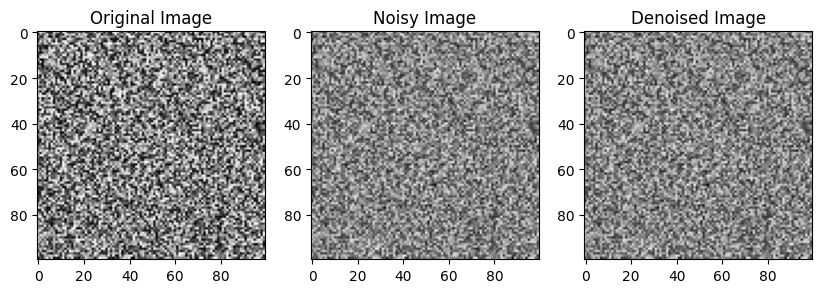

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def total_variation_denoising(image, lambda_=0.1, num_iterations=100, delta=1e-5):
    """
    总变差正则化去噪
    
    :param image: 输入图像
    :param lambda_: 正则化参数
    :param num_iterations: 迭代次数
    :param delta: 梯度下降步长
    :return: 去噪后的图像
    """
    u = image.copy()
    
    for _ in range(num_iterations):
        # 计算梯度
        gradient = np.gradient(u)
        
        # 计算总变差
        total_variation = np.sqrt(gradient[0]**2 + gradient[1]**2)
        
        # 更新图像
        u = u - delta * (u - image + lambda_ * total_variation)
    
    return u

# 示例使用
# 生成示例图像
np.random.seed(42)
image = np.random.rand(100, 100)

# 添加噪声
noisy_image = image + 0.1 * np.random.randn(100, 100)

# 进行总变差正则化去噪
denoised_image = total_variation_denoising(noisy_image, lambda_=0.1, num_iterations=100)

# 绘制原始图像、带噪声的图像和去噪后的图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.show()
